<a href="https://colab.research.google.com/github/TaeWoongYoun/dataAnalysis/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%ED%85%8C%EC%8A%A4%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade yfinance
!pip install numpy==1.23.5 --force-reinstall
!pip install --upgrade scikit-learn pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
tre

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


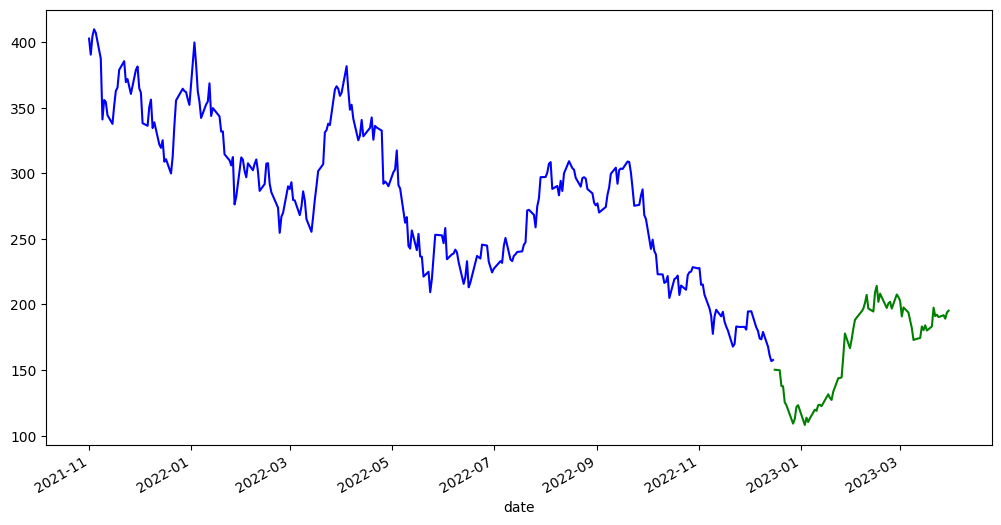

In [1]:
import pandas as pd
import yfinance as yf

tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head()
df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date', 'value']
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

import matplotlib.pyplot as plt
df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)
df_tsla_train['value'].plot(figsize=(12.2, 6.4), color='blue')
df_tsla_test['value'].plot(color='green')
plt.show()

In [2]:
from pmdarima.arima import ndiffs, nsdiffs

print(f"최적의 차분 횟수 (ADF): {ndiffs(df_tsla_train, test='adf')}")
print(f"최적의 차분 횟수 (KPSS): {ndiffs(df_tsla_train, test='kpss')}")
print(f"최적의 차분 횟수 (PP): {ndiffs(df_tsla_train, test='pp')}")

최적의 차분 횟수 (ADF): 1
최적의 차분 횟수 (KPSS): 1
최적의 차분 횟수 (PP): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [3]:
print(f"최적의 차분 횟수 (0SCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 횟수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")

최적의 차분 횟수 (0SCB): 0
최적의 차분 횟수 (CH): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [4]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

n_diffs = 1
model_fit = pm.auto_arima(
    y=df_tsla_train['value'],
    d=n_diffs,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    m=1, seasonal=False,
    stepwise=True,
    trace=True
)

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.439 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Mon, 12 May 2025   AIC                           2197.357
Time:                        07:46:31   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       136.9497      8.602     15.920      0.000     120.089     153.810
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                29.69
Prob(Q):                              0.43   Pr

In [5]:
tsla_pred = model_fit.predict(n_periods=len(df_tsla_test))

df_tsla_pred = pd.DataFrame(tsla_pred)

result = pd.DataFrame(df_tsla_test['value'].values,
                      index=df_tsla_test.index, columns=['value'])
result

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,value
date,
2022-12-16,150.229996
2022-12-19,149.869995
2022-12-20,137.800003
2022-12-21,137.570007
2022-12-22,125.349998
...,...
2023-03-24,190.410004
2023-03-27,191.809998
2023-03-28,189.190002
